#### Module 8, Discussion, Part 1

Link to SOA Probability exercises from which this problem was taken:

https://people.math.osu.edu/ban.1/as/ExamP/P-09-05ques.pdf

33. The loss due to a fire in a commercial building is modeled by a random variable X
with density function

f(x) = 0.005(20 - x)  for 0 < x < 20
f(x) = 0 otherwise

Given that a fire loss exceeds 8, what is the probability that it exceeds 16 ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate

In [2]:
# set up list from zero to 20
x = np.linspace(0, 20, 21)

In [3]:
# create function for f(x)
def f(x):
    y = 0.005*(20 - x)
    return y

In [4]:
"""In this case we know that this is a valid probability density function but for verification let's integrate from 
zero to 20 to make sure that the area under the curve is precisely 1.000."""

integral_f = integrate.quad(f, x[0], x[-1])
print(round(integral_f[0],7))

1.0


In [5]:
"""Solution: This is a conditional probability so we will need to calculate the probability of the 
intersection of the two events, which is the loss being greater than 16, and divide that by the probability of 
the loss being greater than 8.    P(x > 16 | x > 8) = P(x > 16 ∩ x > 8) / P(x > 8)"""

loss_grtr_8 = integrate.quad(f, x[8], x[-1])      # integrate from 8 to 20
loss_grtr_16 = integrate.quad(f, x[16], x[-1])    # integrate from 16 to 20

prob_grtr16_given_grtr8 = loss_grtr_16[0] / loss_grtr_8[0]    # prob. of loss greater than 16 given greater than 8
print('P(x > 16 | x > 8) =',round(prob_grtr16_given_grtr8,5))

P(x > 16 | x > 8) = 0.11111


Things are much clearer if we graph them...

In [6]:
# this is the set up that I used for the vertical lines at y = 8 and y = 16
y1 = np.arange(0, f(8) + .005, .005)
x1 = [8 for i in y1]

y2 = np.arange(0, f(16) + .005, .005)
x2 = [16 for i in y2]

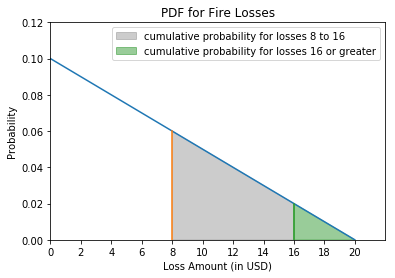

In [7]:
plt.xlim(0, 22)
plt.ylim(0, .12)
plt.xticks(np.arange(0, 22, 2))
plt.plot(x, f(x))
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.title('PDF for Fire Losses')
plt.xlabel('Loss Amount (in USD)')
plt.ylabel('Probability')

x3 = [8, 8, 16, 16]
y3 = [0, f(8), f(16), 0]
x4 = [16, 16, 20]
y4 = [0, .02, 0]

plt.fill(x3, y3, color='grey', alpha=0.4, label='cumulative probability for losses 8 to 16')
plt.fill(x4, y4, color='green', alpha=0.4, label='cumulative probability for losses 16 or greater')
plt.legend();

Note that we can verify our answer by using basic geometry... The area of the green triangle is 0.04 and the area of the sum of the green and grey triangles is 0.36.

0.04 / 0.36 = 1/9 = 0.11111

When we have similar problems that have curves rather then straight lines we need to use the integration option rather than geometry.

#### Module 8, Discussion, Part 2

In [8]:
y1 = np.arange(0, f(8) + .005, .005)
x1 = [8 for i in y1]

y2 = np.arange(0, f(16) + .005, .005)
x2 = [16 for i in y2]

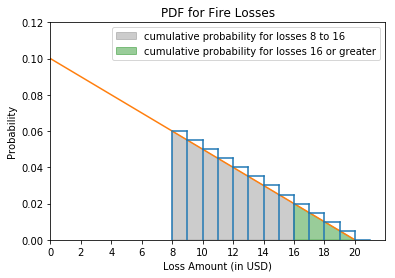

In [9]:
plt.xlim(0, 22)
plt.ylim(0, .12)
plt.xticks(np.arange(0, 22, 2))
plt.plot(x1, y1)
plt.plot(x, f(x))
plt.title('PDF for Fire Losses')
plt.xlabel('Loss Amount (in USD)')
plt.ylabel('Probability')

x3 = [8, 8, 16, 16]
y3 = [0, f(8), f(16), 0]
x4 = [16, 16, 20]
y4 = [0, .02, 0]

x_values = np.arange(8, 21, 1)
y_values = [f(i) for i in x_values]
for i, j in zip(x_values[1:], y_values[1:]):
    plt.axvline(x=i, ymax=(j+0.005)/.12)

for i, j in zip(x_values, y_values):
    plt.axhline(y=j, xmin=i/22, xmax=(i+1)/22)

plt.fill(x3, y3, color='grey', alpha=0.4, label='cumulative probability for losses 8 to 16')
plt.fill(x4, y4, color='green', alpha=0.4, label='cumulative probability for losses 16 or greater')
plt.legend();

Helpful article:

https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot-in-matplotlib

In [10]:
area_rectangles = sum(y_values)
print(area_rectangles)

0.39


In [11]:
area_green_rect = sum(y_values[-5:])
print(area_green_rect)

0.05


In [12]:
print('Probability using rectagles =', round(0.05 / 0.39,4))

Probability using rectagles = 0.1282


#### Module 8, Discussion, Part 3

In [13]:
# define function
def parabola(x):
    y = -(1/4)*((x-2)**2) + 8
    return y

In [15]:
# set up array of x-values
x = np.arange(-4, 10.2, 0.2)

In [16]:
# determine y-intercepts
y_int1 = math.sqrt(-8/(-1/4)) + 2
y_int2 = 2 - (y_int1 - 2)

In [17]:
print(y_int1, y_int2)

7.656854249492381 -3.6568542494923806


In [18]:
# set up intervals for trapezoid areas
n = 8
interval = (y_int1 - y_int2) / n

# x values at each interval
intervals_x = np.arange(y_int2, y_int1 + interval, interval)

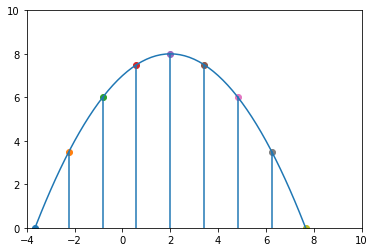

In [19]:
plt.xlim(-4, 10)
plt.ylim(0, 10)
plt.plot(x, parabola(x))
for i, j in zip(intervals_x, parabola(intervals_x)):
    plt.axvline(x=i, ymax=j/10)
for i, j in zip(intervals_x, parabola(intervals_x)):
    plt.scatter(i, j);

Now that we can see the graph, the next step will be to take the average height between each of the points on the curve and multiply that figure by the length of the x-axis intervals since that will provide us with the area of the trapezoids.

In [20]:
# set up empty list then feed the average heights for each pair of adjacent points into the list
avg_heights = []
for i in range(1, len(intervals_x)):
    avg_height = np.average([parabola(intervals_x[i-1]), parabola(intervals_x[i])])
    avg_heights.append(avg_height)

# multiply each value by the interval width to obtain areas
areas = [i*interval for i in avg_heights]

In [21]:
print('area using trapezoidal method:', sum(areas))

area using trapezoidal method: 59.39696961967001


In [22]:
# verification using standard formula:
print('trapezoidal area =', ((intervals_x[-1] - intervals_x[0]) / n)*(0.5*parabola(intervals_x[0]) + parabola(intervals_x[1]) + parabola(intervals_x[2]) + 
      parabola(intervals_x[3]) + parabola(intervals_x[4]) + parabola(intervals_x[5]) + parabola(intervals_x[6]) +
      parabola(intervals_x[7]) + 0.5*parabola(intervals_x[8])))

trapezoidal area = 59.396969619669996


In [23]:
integ_parabola = integrate.quad(parabola, y_int2, y_int1)
print(integ_parabola[0])

60.33977866125207


#### Note: need to input a verification here using the actual trapezoidal formula

In [24]:
print('So the trapezoidal areas are only short by about', round(((integ_parabola[0]-sum(areas))/integ_parabola[0])*100,2),\
      '%.')

So the trapezoidal areas are only short by about 1.56 %.
